In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

# Data Import

In [38]:
ogDf = pd.read_csv("../Data/Data Cleaning and Feature Eng/recent-grads-new-features.csv")
ogDf.head()

,Unnamed: 0,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,...,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science
0,0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,...,0,1,0,0,0,0,0,0,0,0
1,1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,...,0,1,0,0,0,0,0,0,0,0
2,2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,...,0,1,0,0,0,0,0,0,0,0
3,3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,...,0,1,0,0,0,0,0,0,0,0
4,4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,...,0,1,0,0,0,0,0,0,0,0


# Data Exploration
Examine counts of Majors within Major_category

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Agriculture & Natural Resources        10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     6
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64


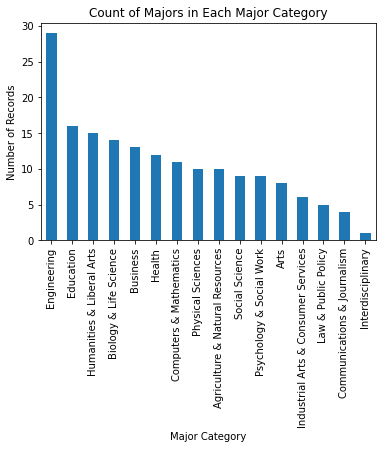

In [39]:
plt.title('Count of Majors in Each Major Category')
plt.xlabel('Major Category')
plt.ylabel('Number of Records')
ogDf.Major_category.value_counts().plot.bar()
print(ogDf.Major_category.value_counts())

# Experiment 1
Apply k-means clustering using all numerical attributes available in the dataset. The objective is to get a baseline understanding of what a basic clustering of this data looks like and to identify any patterns in the data.

Use the Elbow Method and Silhouette Score to determine the optimal cluster size

C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


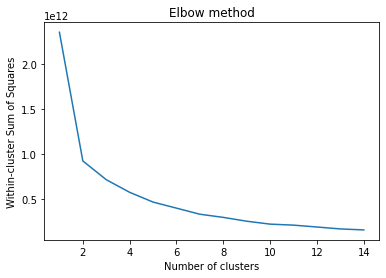

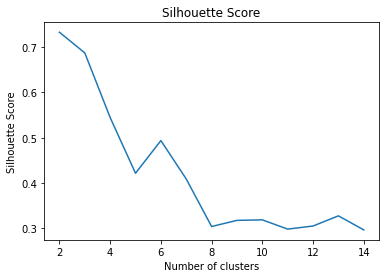

In [40]:
# Features selected for K-Means Clustering
cols = ['Rank','Total','Sample_size','Men','Women','ShareWomen','Employed','Full_time','Part_time','Full_time_year_round','Unemployed','Unemployment_rate','Median','P25th','P75th','College_jobs','Non_college_jobs','Low_wage_jobs']
X = ogDf[cols].values

# Elbow method calculating Within-cluster Sum of Squares
distortions = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    distortions[k] = kmeans.inertia_

# Silhouette score calculation
silouette = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silouette.append(silhouette_score(X,labels,metric='euclidean'))

# Plot Elbow method results
plt.plot(list(distortions.keys()),list(distortions.values()))
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

# Plot Silhouette score results
plt.figure()
plt.plot(range(2,15),silouette)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Choose 2 clusters since the rapid rate of change of the Elbow Method graph slows there and the Silhouette Score is best at this number of clusters

In [41]:
# Apply K-Means Clustering for 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

Create an Output Dataframe that includes the K-Means Classifications. Graph the number of elements in each cluster.

0    153
1     19
Name: Clustering, dtype: int64


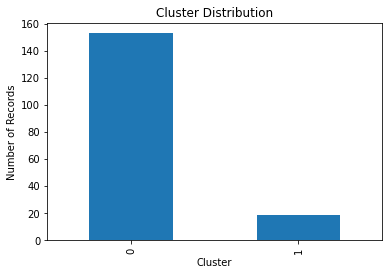

In [42]:
outputDf = ogDf[['Major','Major_category','Rank','Total','Sample_size','Men','Women','ShareWomen','Employed','Full_time','Part_time','Full_time_year_round','Unemployed','Unemployment_rate','Median','P25th','P75th','College_jobs','Non_college_jobs','Low_wage_jobs']].copy()
outputDf['Clustering'] = kmeans.labels_
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Records')
outputDf.Clustering.value_counts().plot.bar()
print(outputDf.Clustering.value_counts())

Observe that Cluster 0 contains the vast majority of the data points.

Conduct a Principle Components Analysis (PCA) to visualize clusters through dimensionality reduction.

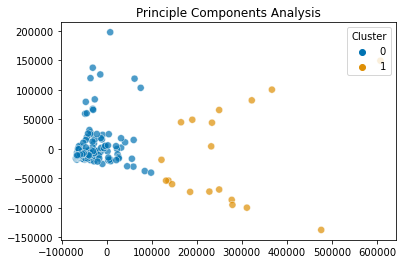

In [43]:
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(X)
sns.scatterplot(data= outputDf, x=pca_feat[:,0], y=pca_feat[:,1],hue=outputDf.Clustering, s=50, palette='colorblind', alpha= 0.7)
plt.legend(loc=1,title='Cluster')
plt.title('Principle Components Analysis')
plt.show()

Observe that Cluster 0 is more tight than Cluster 1. Cluster 1 seems to be fairly spread out.

Calculate Cluster means to identify any differences between clusters.

In [44]:
# Calculate the means of each column
avg_cluster = outputDf.groupby(by='Clustering').mean()
avg_cluster.reset_index(inplace=True)
avg_cluster

,Clustering,Rank,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,0,86.830065,19872.339869,173.045752,14569.359477,17595.052288,0.522372,15724.352941,12875.483660,4732.084967,9591.692810,1203.320261,0.068079,40394.117647,29525.163399,51767.973856,7214.640523,6499.346405,1948.202614
1,1,89.052632,196601.210526,1848.526316,34073.421053,63388.736842,0.528874,157395.894737,133316.315789,42315.578947,102078.736842,12311.421053,0.072682,38205.263158,28757.894737,49894.736842,54104.000000,68622.000000,19449.210526


Observe that major differences are in Total, Sample_size, Employed, Full_time, Part_time, Full_time_year_round, Unemployed, College_jobs, Non_college_jobs, Low_wage_jobs. These features have magnitudes of differences between the clusters.


The differences between many of the remaining features (Rank, Men, Women, ShareWomen, Unemployment_rate, Median, P25th, P75th) are very small. Even larger differences are within the same order of magnitude.

Further inspect college major categories against K-Means Clustering features and clustering results

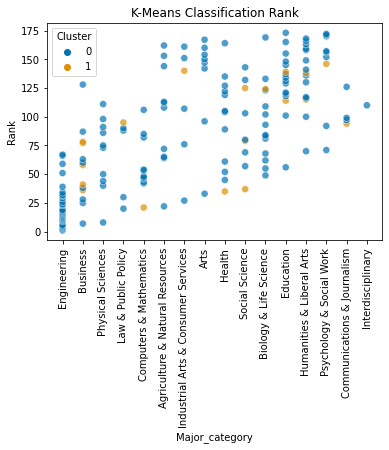

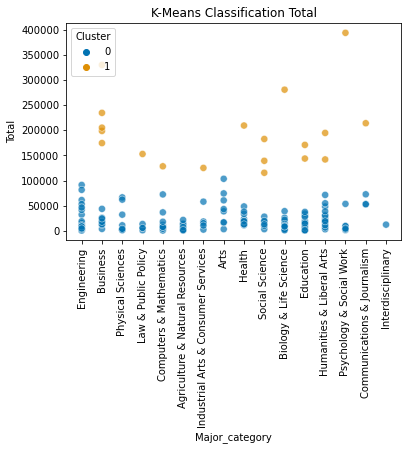

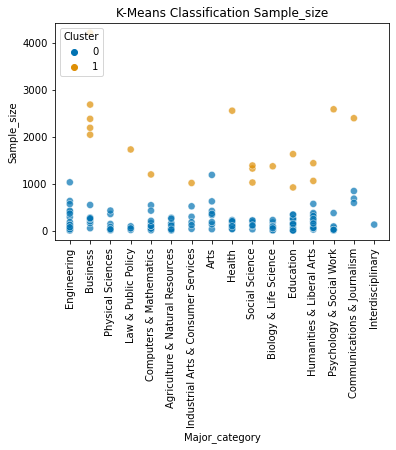

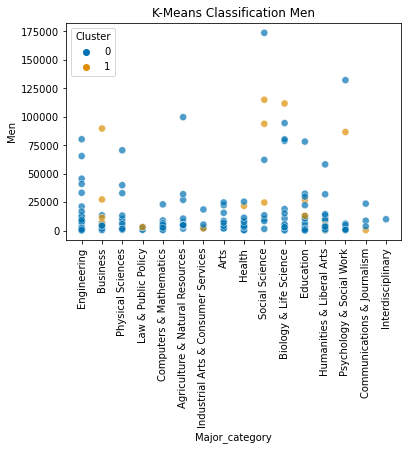

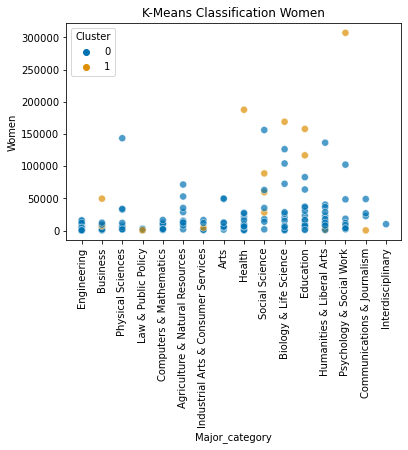

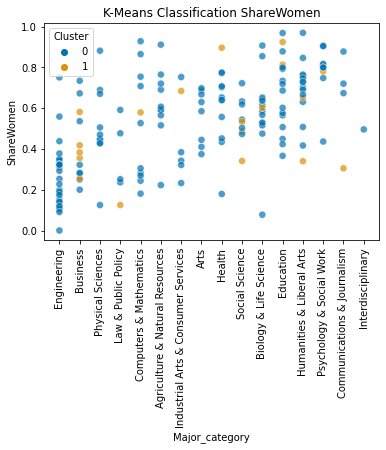

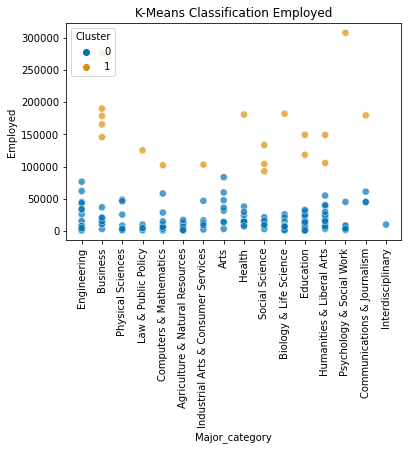

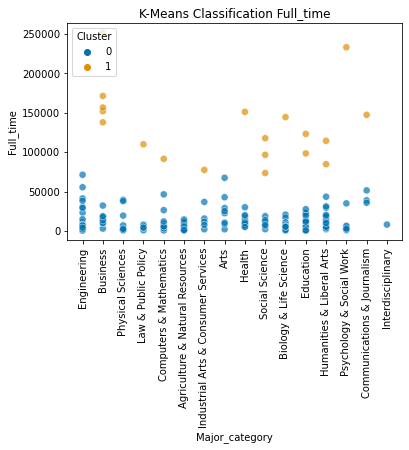

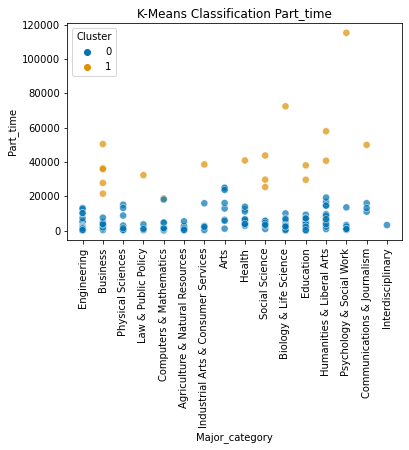

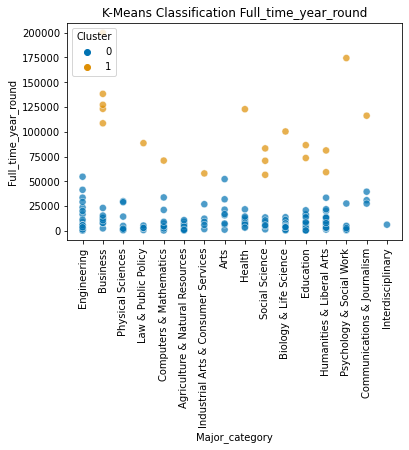

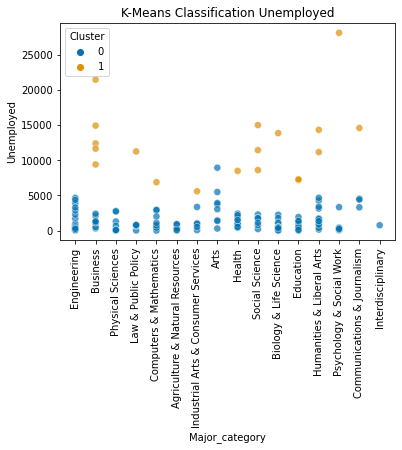

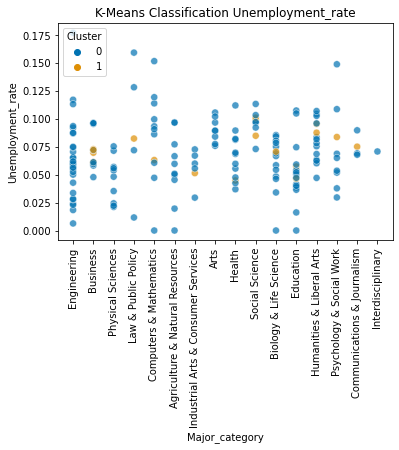

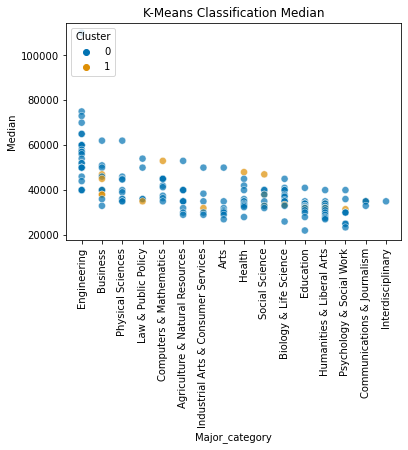

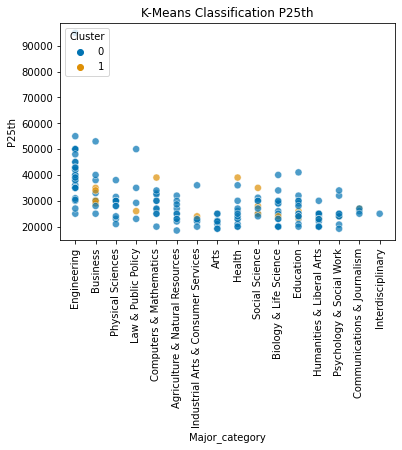

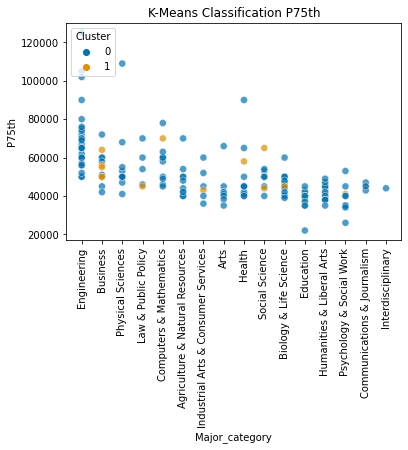

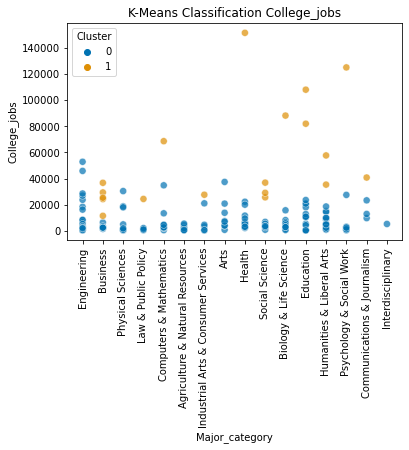

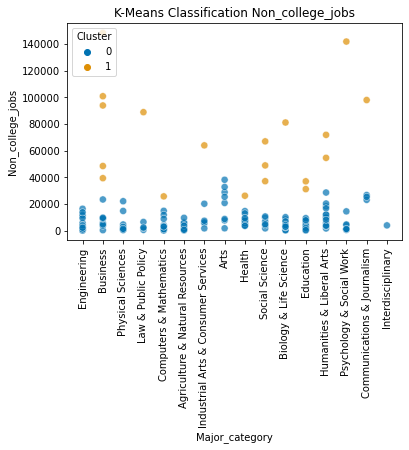

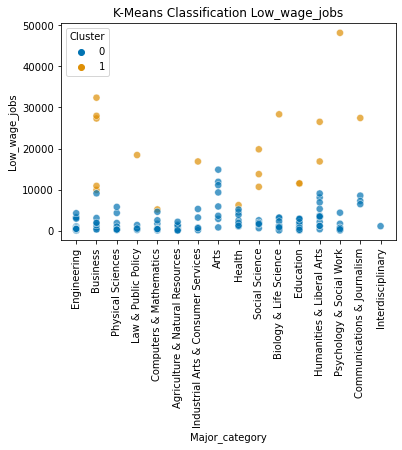

In [45]:
cols = ['Rank','Total','Sample_size','Men','Women','ShareWomen','Employed','Full_time','Part_time','Full_time_year_round','Unemployed','Unemployment_rate','Median','P25th','P75th','College_jobs','Non_college_jobs','Low_wage_jobs']
for x in cols:
    plt.figure()
    sns.scatterplot(data= outputDf, x=outputDf.Major_category, y=outputDf[x],hue=outputDf.Clustering, s=50, palette='colorblind', alpha= 0.7)
    plt.legend(loc=2,title='Cluster')
    plt.xticks(rotation=90)
    plt.title('K-Means Classification ' + x)
    plt.plot()

Similar to the observations found in the means of the clusters, no obvious clustering is found between Major Category against any of Rank, Men, Women, ShareWomen, Unemployment_rate, Median, P25th, or P75th.

Clusters are more obvious comparing Major Category against each of Total, Sample_size, Employed, Full_time, Part_time, Full_time_year_round, Unemployed, College_jobs, Non_college_jobs, and Low_wage_jobs. There is a relatively clear separation between high and low values.

Now, we'll inspect the small cluster (Cluster 1) to identify any further correlations.

In [46]:
outputDf.loc[outputDf['Clustering'] == 1].sort_values(['Major_category',"Major"],ascending = [True,True])

,Major,Major_category,Rank,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Clustering
122,BIOLOGY,Biology & Life Science,124,280709,1370,111762,168947,0.601858,182295,144512,...,100336,13874,0.070725,33400,24000,45000,88232,81109,28339,1
40,ACCOUNTING,Business,41,198633,2042,27392,9306,0.253583,165527,151967,...,123169,12411,0.069749,45000,34000,56000,11417,39323,10886,1
75,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,77,329927,4212,6383,8849,0.580948,276234,251540,...,199897,21502,0.072218,38000,29000,50000,36720,148395,32395,1
35,FINANCE,Business,36,174506,2189,89749,49498,0.355469,145696,137921,...,108595,9413,0.060686,47000,35000,64000,24243,48447,9910,1
57,GENERAL BUSINESS,Business,58,234590,2380,6053,4346,0.417925,190183,171385,...,138299,14946,0.072861,40000,30000,55000,29334,100831,27320,1
76,MARKETING AND MARKETING RESEARCH,Business,78,205211,2684,11404,7076,0.382900,178862,156668,...,127230,11663,0.061215,38000,30000,50000,25320,93889,27968,1
92,COMMUNICATIONS,Communications & Journalism,94,213996,2394,476,209,0.305109,179633,147335,...,116251,14602,0.075177,35000,27000,45000,40763,97964,27440,1
20,COMPUTER SCIENCE,Computers & Mathematics,21,128319,1196,1837,2524,0.578766,102087,91485,...,70932,6884,0.063173,53000,39000,70000,68622,25667,5144,1
137,ELEMENTARY EDUCATION,Education,139,170862,1629,13029,157833,0.923745,149339,123177,...,86540,7297,0.046586,32000,23400,38000,108085,36972,11502,1
112,GENERAL EDUCATION,Education,114,143718,919,26893,116825,0.812877,118241,98408,...,73531,7195,0.057360,34000,26000,41000,82007,31112,11443,1


Beyond the correlations found in the clustering's explanatory variables, there does not appear to be an obvious pattern in which programs tend to be large. 11 of 16 Major_category values are represented here which indicate that most of the major categories have at least 1 program that is quite large. The missing major categories from Cluster 1 are Engineering, Physical Sciences, Agriculture and Natural Resources, Arts, and Interdisciplinary.

This K-Means Clustering appears to have distinguished programs with large populations from those with smaller populations. This clustering could be useful to quickly identify distinct groups of programs with similar populations across several of the features found in the dataset such as Total, Full_time, Part_time, etc. This method clearly separated groups of programs using several population variables without the need of an individual manually specifying thresholds for each feature. By using this procedure, college and university administrations could quickly identify programs that have small and large populations for targeted initiatives. In the dataset used, we have identified 19 programs whose population means are an order of magnitude larger than others. Using this information, the administration can examine whether these large populations are desired and what may be causing these large program sizes. Based on the needs of the administration, they can use this as a starting point to identify both positive and negative anomolies in their student population. Further analysis may inform knowledge-transfer opportunities between departments, institutional marketing gaps, and more. In this specific case, the administration may wish to examine whether there are growth opportunities in any of the Engineering, Physical Sciences, Agriculture and Natural Resources, Arts, and Interdisciplinary major categories since none of their programs are represented in Cluster 1 (which contains the 19 programs with significantly larger program sizes)

# Experiment 2
Clearly, the most influential features in Experiment 1 were population counts. The magnitude of these values likely skewed the results of the clustering to be focused on population sizes because other parameters were smaller. For example, ShareWomen is a ratio which can only range from 0-1 whereas Total is a count that has values as large as 393,735. To reduce the impact of features with large values on the results of the clustering, Experiment 2 will apply scaling to standardize the explanatory variables used in Experiment 1 to examine differences between a standardized and non-standardized K-Means Clustering. The hypothesis is that standardizing the features in the clustering will result in different clusters and an alternative perspective on the data.

In [47]:
# Import Scaler
from sklearn.preprocessing import StandardScaler

Apply Standardization through scaling

In [48]:
# Features selected for K-Means Clustering
cols = ['Rank','Total','Sample_size','Men','Women','ShareWomen','Employed','Full_time','Part_time','Full_time_year_round','Unemployed','Unemployment_rate','Median','P25th','P75th','College_jobs','Non_college_jobs','Low_wage_jobs']
# Separating the features
X = ogDf.loc[:, cols].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

Use the Elbow Method and Silhouette Score to determine the optimal cluster size

C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


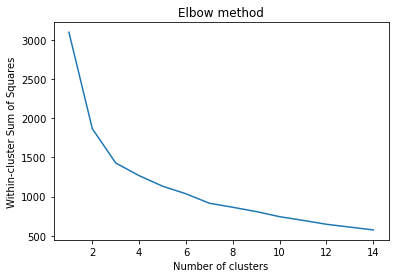

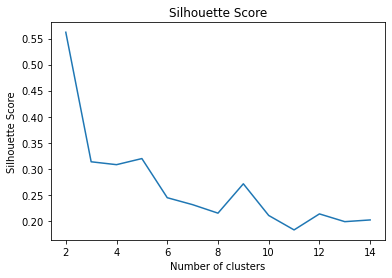

In [49]:
# Elbow method calculating Within-cluster Sum of Squares
distortions = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    distortions[k] = kmeans.inertia_

# Silhouette score calculation
silouette = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silouette.append(silhouette_score(X,labels,metric='euclidean'))

# Plot Elbow method results
plt.plot(list(distortions.keys()),list(distortions.values()))
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

# Plot Silhouette score results
plt.figure()
plt.plot(range(2,15),silouette)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Choose 2 clusters since the rapid rate of change of the Elbow Method graph slows there and the Silhouette Score is best at this number of clusters.

Compared to Experiment 1, the Silhouette Score of Experiment 2 has decreased for each number of clusters. This indicates that the clusters are less distinct from one another. This is what we might expect from reducing the influence of large-valued features using standardization.

In [50]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

Create an Output Dataframe that includes the K-Means Classifications. Graph the number of elements in each cluster.

0    152
1     20
Name: Clustering, dtype: int64


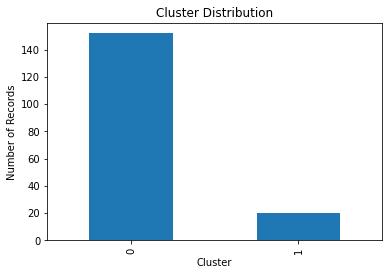

In [51]:
outputDf = ogDf[['Major','Major_category','Rank','Total','Sample_size','Men','Women','ShareWomen','Employed','Full_time','Part_time','Full_time_year_round','Unemployed','Unemployment_rate','Median','P25th','P75th','College_jobs','Non_college_jobs','Low_wage_jobs']].copy()
outputDf['Clustering'] = kmeans.labels_
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Records')
outputDf.Clustering.value_counts().plot.bar()
print(outputDf.Clustering.value_counts())

Observe that Cluster 0 still contains the vast majority of the data points, similar to Experiment 1. Upon first glance, it appears as though 1 record has moved from Cluster 0 to Cluster 1. We can come back to this momentarily.

Conduct a Principle Components Analysis (PCA) to visualize clusters through dimensionality reduction.

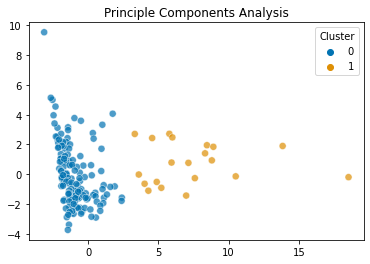

In [52]:
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(X)
sns.scatterplot(data= outputDf, x=pca_feat[:,0], y=pca_feat[:,1],hue=outputDf.Clustering, s=50, palette='colorblind', alpha= 0.7)
plt.legend(loc=1,title='Cluster')
plt.title('Principle Components Analysis')
plt.show()

Observe that both clusters seem to be fairly spread out overall, moreso than Experiment 1 which aligns with the Silhoutte Score.

Calculate Cluster means to identify any differences between clusters.

In [61]:
# Calculate the means of each column
avg_cluster = outputDf.groupby(by='Clustering').mean()
avg_cluster.reset_index(inplace=True)
avg_cluster

,Clustering,Rank,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,0,86.769737,19322.289474,166.381579,14608.519737,17676.888158,0.523346,15278.572368,12516.453947,4602.776316,9311.092105,1152.375,0.067890,40429.605263,29554.934211,51812.5,7016.125,6291.322368,1863.394737
1,1,89.400000,191945.150000,1815.400000,32800.600000,60477.100000,0.521148,153700.250000,130022.900000,41419.150000,99586.950000,12143.200,0.073887,38045.000000,28570.000000,49650.0,53268.250,67096.850000,19218.700000


Comparing the original features of the data (not the standardized ones), observe that major differences are still in Total, Sample_size, Employed, Full_time, Part_time, Full_time_year_round, Unemployed, College_jobs, Non_college_jobs, and Low_wage_jobs. These features still have magnitudes of differences between the clusters.


Again, similar to Experiment 1, the differences between many of the remaining features (Rank, Men, Women, ShareWomen, Unemployment_rate, Median, P25th, P75th) are very small. Even larger differences are within the same order of magnitude.

We can inspect Cluster 1 again to identify any differences compared to Experiment 1.

In [54]:
outputDf.loc[outputDf['Clustering'] == 1].sort_values(['Major_category',"Major"],ascending = [True,True])

,Major,Major_category,Rank,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Clustering
94,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,96,103480,1186,8617,5156,0.374356,83483,67448,...,52243,8947,0.096798,35000,25000,45000,37389,38119,14839,1
122,BIOLOGY,Biology & Life Science,124,280709,1370,111762,168947,0.601858,182295,144512,...,100336,13874,0.070725,33400,24000,45000,88232,81109,28339,1
40,ACCOUNTING,Business,41,198633,2042,27392,9306,0.253583,165527,151967,...,123169,12411,0.069749,45000,34000,56000,11417,39323,10886,1
75,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,77,329927,4212,6383,8849,0.580948,276234,251540,...,199897,21502,0.072218,38000,29000,50000,36720,148395,32395,1
35,FINANCE,Business,36,174506,2189,89749,49498,0.355469,145696,137921,...,108595,9413,0.060686,47000,35000,64000,24243,48447,9910,1
57,GENERAL BUSINESS,Business,58,234590,2380,6053,4346,0.417925,190183,171385,...,138299,14946,0.072861,40000,30000,55000,29334,100831,27320,1
76,MARKETING AND MARKETING RESEARCH,Business,78,205211,2684,11404,7076,0.382900,178862,156668,...,127230,11663,0.061215,38000,30000,50000,25320,93889,27968,1
92,COMMUNICATIONS,Communications & Journalism,94,213996,2394,476,209,0.305109,179633,147335,...,116251,14602,0.075177,35000,27000,45000,40763,97964,27440,1
20,COMPUTER SCIENCE,Computers & Mathematics,21,128319,1196,1837,2524,0.578766,102087,91485,...,70932,6884,0.063173,53000,39000,70000,68622,25667,5144,1
137,ELEMENTARY EDUCATION,Education,139,170862,1629,13029,157833,0.923745,149339,123177,...,86540,7297,0.046586,32000,23400,38000,108085,36972,11502,1


We can see that Cluster 1 has remained the same as in Experiment 1, except that there has been the addition of the "COMMERCIAL ART AND GRAPHIC DESIGN" Major. This indicates that, even with the standardization, the features being used for this K-Means Clustering is still being heavily influenced by the same parameters. This may indicate that the features themselves are playing a large role in the clustering. The "COMMERCIAL ART AND GRAPHIC DESIGN" Major, as the program with the next lowest Total value, it makes sense that a clustering still strongly influenced by previously mentioned explanatory variables with reduced weighting of the large-valued variables is now included in this clustering. This indicates that the standardization was a limited success.

# Experiment 3
With the most influential features in Experiment 1 & 2 being features related to population counts, even with standardization, the features used in the K-Means Clustering should be re-considered to generate an alternative clustering. The previous K-Means Clusterings can help college and university administrations to identify significant differences between the sizes of student populations in each of their programs. However, a differently feature engineered K-Means Clustering may yield different results offering another perspective on the data.

Again, to reduce the impact that Total, Sample_size, Employed, Full_time, Part_time, Full_time_year_round, Unemployed, College_jobs, Non_college_jobs, and Low_wage_jobs has on the clustering, we will transform these features into different representations of the data. The hypothesis is that by changing the features used in the K-Means Clustering and changing the representation of the data will result in different clusters and an alternative view on the data more than the standardization in Experiment 2 was able to.

Rank, Total, ShareWomen, Unemployment_rate, Median, P25th, and P75th will continue to be used as features.

In addition to those, the following features were added to the recent-grads-new-features.csv using the appropriate calculations as seen below:
- Percent_employed = Employed / Total
- Percent_full_time = Full_time / Total
- Percent_part_time = Part_time / Total
- Percent_unemployed = Unemployed / Total
- Percent_college = College_jobs / Total
- Percent_non_college = Non_college_jobs / Total
- Percent_low_wage = Low_wage_jobs / Total

Use the Elbow Method and Silhouette Score to determine the optimal cluster size

C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


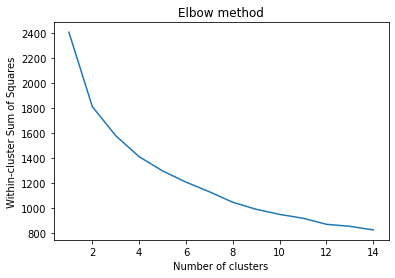

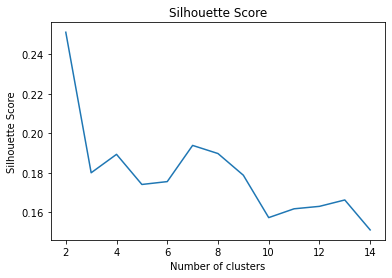

In [76]:
cols = ['Rank','Total','ShareWomen','Percent_employed','Percent_full_time','Percent_part_time','Percent_unemployed','Unemployment_rate','Median','P25th','P75th','Percent_college','Percent_non_college','Percent_low_wage']
# Separating out the features
X = ogDf.loc[:, cols].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

distortions = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    distortions[k] = kmeans.inertia_

silouette = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silouette.append(silhouette_score(X,labels,metric='euclidean'))

plt.plot(list(distortions.keys()),list(distortions.values()))
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

plt.figure()
plt.plot(range(2,15),silouette)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Choose 2 clusters since the rapid rate of change of the Elbow Method graph slows there and the Silhouette Score is best at this number of clusters.

Compared to Experiment 1 & 2, the Silhouette Score of Experiment 3 has decreased for each number of clusters. This indicates that the clusters are less distinct from one another.

In [78]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

Create an Output Dataframe that includes the K-Means Classifications. Graph the number of elements in each cluster.

0    115
1     57
Name: Clustering, dtype: int64


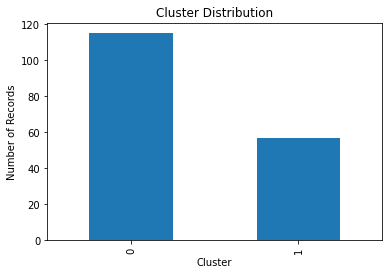

In [79]:
outputDf = ogDf[['Major','Major_category','Rank','Total','ShareWomen','Percent_employed','Percent_full_time','Percent_part_time','Percent_unemployed','Unemployment_rate','Median','P25th','P75th','Percent_college','Percent_non_college','Percent_low_wage']].copy()
outputDf['Clustering'] = kmeans.labels_
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Records')
outputDf.Clustering.value_counts().plot.bar()
print(outputDf.Clustering.value_counts())

Observe that Cluster 0 again contains the vast majority of the data points, similar to Experiment 1 & 2. However, Cluster 1 now contains about half the records that Cluster 0 has. This indicates there has been a significant change between this experiment and the previous. We can investigate this further below.

Conduct a Principle Components Analysis (PCA) to visualize clusters through dimensionality reduction.

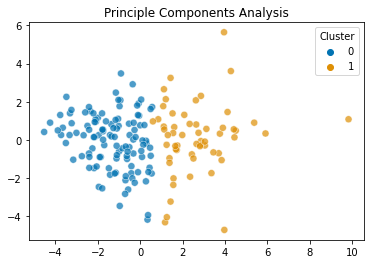

In [82]:
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(X)
sns.scatterplot(data= outputDf, x=pca_feat[:,0], y=pca_feat[:,1],hue=outputDf.Clustering, s=50, palette='colorblind', alpha= 0.7)
plt.legend(loc=1,title='Cluster')
plt.title('Principle Components Analysis')
plt.show()

Observe that both clusters seem to be fairly spread out overall, moreso than Experiment 1 & 2 which aligns with the Silhoutte Score.

Calculate Cluster means to identify any differences between clusters.

In [90]:
# Calculate the means of each column
avg_cluster = outputDf.groupby(by='Clustering').mean()
avg_cluster.reset_index(inplace=True)
avg_cluster

,Clustering,Rank,Total,ShareWomen,Percent_employed,Percent_full_time,Percent_part_time,Percent_unemployed,Unemployment_rate,Median,P25th,P75th,Percent_college,Percent_non_college,Percent_low_wage
0,0,113.086957,44339.165217,0.607709,0.787720,0.633357,0.256018,0.061335,0.072240,34367.826087,25310.000000,44578.260870,0.308867,0.376350,0.107865
1,1,34.596491,29419.070175,0.352367,0.804214,0.727734,0.160948,0.052717,0.061217,51822.807018,37773.684211,65649.122807,0.445247,0.235102,0.055190


In [91]:
# Calculate the medians of each column
med_cluster = outputDf.groupby(by='Clustering').median()
med_cluster.reset_index(inplace=True)
med_cluster

,Clustering,Rank,Total,ShareWomen,Percent_employed,Percent_full_time,Percent_part_time,Percent_unemployed,Unemployment_rate,Median,P25th,P75th,Percent_college,Percent_non_college,Percent_low_wage
0,0,114.0,18109.0,0.637293,0.801205,0.634889,0.256265,0.060914,0.071540,34000.0,25000.0,45000.0,0.288838,0.377088,0.098758
1,1,29.0,8925.0,0.322222,0.809757,0.727384,0.158981,0.052192,0.059824,50000.0,36000.0,64000.0,0.462963,0.205607,0.052758


In [92]:
# Calculate the minimums of each column
min_cluster = outputDf.groupby(by='Clustering').min()
min_cluster.reset_index(inplace=True)
min_cluster

,Clustering,Major,Major_category,Rank,Total,ShareWomen,Percent_employed,Percent_full_time,Percent_part_time,Percent_unemployed,Unemployment_rate,Median,P25th,P75th,Percent_college,Percent_non_college,Percent_low_wage
0,0,ADVERTISING AND PUBLIC RELATIONS,Agriculture & Natural Resources,33,685,0.077453,0.553532,0.372872,0.117864,0.0,0.0,22000,18500,22000,0.053268,0.134944,0.0
1,1,ACCOUNTING,Agriculture & Natural Resources,1,609,0.000000,0.602544,0.532334,0.000000,0.0,0.0,34000,20000,35000,0.057478,0.069444,0.0


In [93]:
# Calculate the maximums of each column
max_cluster = outputDf.groupby(by='Clustering').max()
max_cluster.reset_index(inplace=True)
max_cluster

,Clustering,Major,Major_category,Rank,Total,ShareWomen,Percent_employed,Percent_full_time,Percent_part_time,Percent_unemployed,Unemployment_rate,Median,P25th,P75th,Percent_college,Percent_non_college,Percent_low_wage
0,0,ZOOLOGY,Social Science,173,393735,0.968954,0.905352,0.844764,0.411377,0.144490,0.159491,50000,40000,66000,0.745413,0.702569,0.300951
1,1,SPECIAL NEEDS EDUCATION,Social Science,121,209394,0.927807,0.956165,0.958949,0.347477,0.155461,0.177226,110000,95000,125000,0.751493,0.529907,0.138060


By inspecting the means, medians, minimums, and maximums of the clusters, we can make some common observations.

Cluster 0 Characteristics of Majors:
- Lower median earnings (seen in Rank, Median, P25th, and P75th)
- More people with major (seen in Total)
- More female graduates (seen in ShareWomen)
- Slighly less employment (seen in Percent_employed), slightly more unemployment (seen in Percent_unemployed & Unemployment_rate)
- Less in full-time positions, more in part-time positions
- Less in jobs requiring a college degree, more in jobs not requiring a college degree
- More in low wage service jobs

Cluster 1 has the opposite characteristics of Cluster 0.

We can also inspect which Major Categories that the Majors in these clusters belong to, as seen below.

Humanities & Liberal Arts              15
Biology & Life Science                 13
Education                              12
Health                                  9
Agriculture & Natural Resources         9
Psychology & Social Work                9
Arts                                    8
Physical Sciences                       8
Social Science                          8
Business                                7
Industrial Arts & Consumer Services     5
Communications & Journalism             4
Computers & Mathematics                 3
Law & Public Policy                     3
Engineering                             1
Interdisciplinary                       1
Name: Major_category, dtype: int64


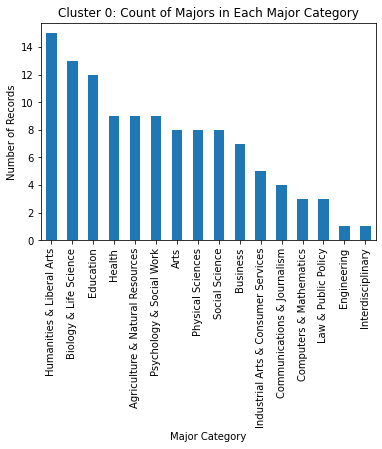

In [84]:
plt.title('Cluster 0: Count of Majors in Each Major Category')
plt.xlabel('Major Category')
plt.ylabel('Number of Records')
outputDf.loc[outputDf['Clustering'] == 0].Major_category.value_counts().plot.bar()
print(outputDf.loc[outputDf['Clustering'] == 0].Major_category.value_counts())

Engineering                            28
Computers & Mathematics                 8
Business                                6
Education                               4
Health                                  3
Physical Sciences                       2
Law & Public Policy                     2
Agriculture & Natural Resources         1
Industrial Arts & Consumer Services     1
Social Science                          1
Biology & Life Science                  1
Name: Major_category, dtype: int64


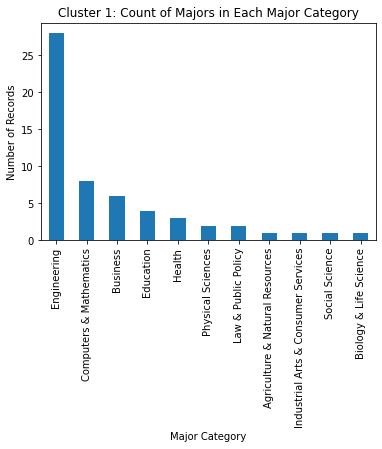

In [85]:
plt.title('Cluster 1: Count of Majors in Each Major Category')
plt.xlabel('Major Category')
plt.ylabel('Number of Records')
outputDf.loc[outputDf['Clustering'] == 1].Major_category.value_counts().plot.bar()
print(outputDf.loc[outputDf['Clustering'] == 1].Major_category.value_counts())

Based on the results of Experiment 3's clustering, college and university administrations can understand the characteristics of their majors and the underlying demographics within them. As mentioned previously, the results of the clustering was that:

Cluster 0 Characteristics of Majors:
- Lower median earnings (seen in Rank, Median, P25th, and P75th)
- More people with major (seen in Total)
- More female graduates (seen in ShareWomen)
- Slighly less employment (seen in Percent_employed), slightly more unemployment (seen in Percent_unemployed & Unemployment_rate)
- Less in full-time positions, more in part-time positions
- Less in jobs requiring a college degree, more in jobs not requiring a college degree
- More in low wage service jobs

Cluster 1 has the opposite characteristics of Cluster 0.

Based on these results, the administration can clearly see some correlations within the data suggesting that certain majors have poorer employment and earning prospects. It also indicates that these majors tend to have more female graduates. Although little may be able to be done about earnings, since the industry tends to dictate those figures, this may indicate that these majors in Cluster 0 may be in need of assistance in finding employment in the first place. It may also suggest that the female demographic specifically may also be in need of employment assistance due to the higher proportion of females in Cluster 0. Alternatively, this could indicate that more females should be recruited into majors contained in Cluster 1. Examples like these demonstrate how Experiment 3's K-Means Clustering could be applied by college and university administrations to focus their efforts to improving their programs. Compared to Experiments 1 & 2, Experiment 3 has a wider range of potential implications. Experiments 1 & 2 where only able to distinguish distinct magnitudes of student populations. Experiment 3 seems to have more interpretable results that go beyond population measures.